**Resume** **Classification**

In [ ]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install nltk
!pip3 install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 3.5.4
    Uninstalling Sphinx-3.5.4:
      Successfully uninstalled Sphinx-3.5.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=27fa77ad8ab5006462fd58e2e40fb07895296713bd1068b8d62d0a882ccc9586
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 33.5 MB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing** **Libraries**

In [ ]:
import os,re
import pandas as pd
import numpy as np
import docx2txt
import textract
from docx import Document
import nltk 
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Show** **the** ***Resumes*** **which** **we** **have** **uploaded** **on** **MyDrive**

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Resumes')

['Internship_Susovan Bag_Musquare Technologies.docx',
 'React Developer_Haripriya.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'React Developer_Naveen sadhu.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'React Developer_Pragnya.docx',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'Reactjs Developer_M Lokesh.docx',
 'React Developer_Vinay Reddy.doc',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React Developer_Deepakreddy.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'React Dev_Krishna Kanth.docx',
 'React JS Developer_KotaniDurga

**Creating** **Empty** **Sets**

In [ ]:
file_path = []
category = []

**Appending all "React JS Developer Resumes"**

In [ ]:
directory = '/content/drive/MyDrive/Colab Notebooks/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [ ]:
file_path, category

(['SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\nSMART  AGRICULTURE   \n\nBuilt  a  product  for  farmers  using  IoT  as  a  solution     \n\nAUTOMATIC  WATER  MOTOR  CONTROLLER  (2019 -   2020)    \n\nIoT,  android  and  API  technologies  combined

In [ ]:
file_path_1 = []
category_1 = []

**Appending All "Peoplesoft Resumes"**

In [ ]:
directory_1 = '/content/drive/MyDrive/Colab Notebooks/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft Resumes')

In [ ]:
file_path_1,category_1

(["C O N T A C T :\n\n\n\nAddress: Manyata Tech Park,\n\nNagavara, Bangalore 560045\n\n\n\nLinIn: subha-santosh-b16698139\n\n\n\nS K I L L S :\n\n\n\nPeopleSoft Finance FSCM ARIBA\n\nJAVA Full Stack Development SQL\n\nPower BI\n\n\n\nI N T E R E S T S :\n\n\n\nLearning new Technologies. Planting Hybrid Species.\n\nCooking. Travelling Singing.\n\n\n\nS T R E N G T H S :\n\n\n\nTime Management. Responsible for my deliverables.\n\nLeadership qualities.\n\n\n\nL A N G U A G E S :\n\n\n\nJapanese.\n\nFrench (Started Learning).\n\n\nSRI SUBHA SANTOSH KUMAR JOSYULA\n\nA S S O C I A T E C O N S U L T A N T\n\nP R O F E S S I O N A L S U M M A R Y :\n\n\n\nI am having more than 3.2 years of experience in assistance and development for projects like ARIBA and PEOPLESOFT FINANCE . I have successfully completed TOOLS PATCH and TOOLS UPGRADE PROJECT with 0% refuse validations. I am the main Point of contact in Non Regression Testing and User Acceptance Testing. I am responsible to find solutions wh

In [ ]:
file_path_2 = []
category_2 = []

**Appending All "SQL Developer Lightning Insight Resumes"**

In [ ]:
directory_2 = '/content/drive/MyDrive/Colab Notebooks/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resumes')

In [ ]:
file_path_2,category_2

(['RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional Summary:\n\nHaving 2.10 years of Professional experience in SQL Server 2014/2017.\n\nHaving experience in creating database objects such as Stored Procedures, Functions, Views,Indexes,Joins to facilitate efficient data Manipulation and Data Consistency.\n\nHaving good experience in writing complex queries using Derived Table, Sub-Queries, Set Operators and Joins.\n\nHaving Proficient Experience on Temporary Objects in SQL like CTE,Temporary Table, Table Variable.\n\n I have very good experience with SQL Profile by Debugging the Query.\n\nExperience in Creating and Updating Clustered and Non-Clustered Indexes to keep up the SQL Server Performance.\n\n\n\nProfessional Experience:\n\n\n\nCurrently working as Software Developer at Square Bridge Technologies PVT LTD, Bangalore since SEP 2018 to till date.\n\nAcademic Profile: \n\n\t B.Tech in Electronics and communication engineering(ECE) From JNTU Hyderabad.\n\n\t Intermediate in M.P.C from

In [ ]:
file_path_3 = []
category_3 = []

**Appending All "Workday Resumes"**

In [ ]:
directory_3 = '/content/drive/MyDrive/Colab Notebooks/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resumes')

In [ ]:
file_path_3, category_3

(['WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\nRole \t\t: Workday Consultant \n\n\n\nProfessional Summary:\n\n\n\nHaving 6+ years of experience in Workday as a Workday Consultant, and involved in Workday HCM|FCM,  security ,support and enhancement Projects.\n\n\n\nHaving good understand of various Functional areas in HCM as well as Workday Financial.\n\n\n\nHCM – Core HCM, Absence, Time Tracking, Recruiting, and Benefits.\n\n\n\nFCM – Procure to Pay, Payables, Business Assets , Expense, Billing and  Revenue. \n\n\n\nTechnically proficient in customizations, enhancements using various tools like Report writer, Calculated Fields, EIB, Core Connector, DT and Workday Studio. \n\n\n\nHave good experience in various core connector templates like Core Connector worker, PICOFF and PECI.\n\n\n\nGood Working knowledge workday studio components like workday-In, workday-out Rest, Workday-out Soap, A-sync mediation, Splitter, aggregator, MVEL, Store, CSV-to-XML in Workday Studio.\n\n\n\nGood Wor

**Store Data in a "dataset" Variable Containing files under File_path (Resume Titles)**

In [ ]:
dataset = pd.DataFrame(data = file_path , columns = ['Resumes'])
dataset

,Resumes
0,SUSOVAN BAG \n\nSeeking a challenging po...
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...
2,Name: Ravali P \n\n\n\n ...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
5,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
6,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...
7,KAMALAKAR REDDY. A \n\nLinked In: https://www....
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
9,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...


**Show the Columns Named as Resumes & Cateory**

In [ ]:
dataset['category'] = category
dataset

,Resumes,category
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
5,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
6,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
7,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
9,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume


In [ ]:
dataset_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
dataset_1['category_1'] = category_1
dataset_1

,Resumes,category_1
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft Resumes
1,\n PeopleSoft Database Ad...,PeopleSoft Resumes
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Resumes
3,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft Resumes
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Resumes
5,\n PeopleSoft Admin/Peo...,PeopleSoft Resumes
6,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resumes
7,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft Resumes
8,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Resumes
9,\n|Personal Details ...,PeopleSoft Resumes


In [ ]:
dataset_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
dataset_2['category_2'] = category_2
dataset_2

,Resumes,category_2
0,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resumes
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resumes
2,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning Insight Resumes
3,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning Insight Resumes
4,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resumes
5,\n SQL S...,SQL Developer Lightning Insight Resumes
6,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning Insight Resumes
7,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resumes
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning Insight Resumes
9,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning Insight Resumes


In [ ]:
dataset_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
dataset_3['category_3'] = category_3
dataset_3

,Resumes,category_3
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resumes
1,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resumes
2,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resumes
3,\n Hari Krishna ...,Workday Resumes
4,\n[pic] Name...,Workday Resumes
5,\nShireesh ...,Workday Resumes
6,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resumes
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resumes
8,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resumes
9,G Himaja\n\n ...,Workday Resumes


In [ ]:
data = dataset.append([dataset_1, dataset_2, dataset_3], ignore_index = True)
data

<ipython-input-22-8b3f6d512166>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataset.append([dataset_1, dataset_2, dataset_3], ignore_index = True)


,Resumes,category,category_1,category_2,category_3
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\n\n Madeeswar A\n...,NaN,NaN,NaN,Workday Resumes
75,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday Resumes
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday Resumes


In [ ]:
data['Category'] = category + category_1 + category_2 + category_3
data

,Resumes,category,category_1,category_2,category_3,Category
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\n\n Madeeswar A\n...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes,Workday Resumes
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


In [ ]:
data.iloc[:,0]

0     SUSOVAN  BAG   \n\nSeeking  a  challenging  po...
1     HARIPRIYA BATTINA \n\nExperience as UI Develop...
2     Name: Ravali P \n\n\n\n                       ...
3     Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
4     MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...
                            ...                        
74    \n\n                             Madeeswar A\n...
75    Vinay kumar .v\nWorkday Functional Consultant\...
76    \nHarikrishna Akula\n\n\n\n Summary:\n    ❖ 5....
77    \nName  : Naresh Babu Cherukuri\n\n\nObjective...
78    Workday HCM  Techno functional Consultant     ...
Name: Resumes, Length: 79, dtype: object

In [ ]:
data

,Resumes,category,category_1,category_2,category_3,Category
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\n\n Madeeswar A\n...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes,Workday Resumes
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


In [ ]:
data=data.iloc[:,[0,5]]

In [ ]:
data

,Resumes,Category
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
...,...,...
74,\n\n Madeeswar A\n...,Workday Resumes
75,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resumes
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resumes
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday Resumes


In [ ]:
data.head()

,Resumes,Category
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume


In [ ]:
data.tail()

,Resumes,Category
74,\n\n Madeeswar A\n...,Workday Resumes
75,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resumes
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resumes
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday Resumes
78,Workday HCM Techno functional Consultant ...,Workday Resumes


***Data*** ***Exploration***

In [ ]:
data.isnull().any()

Resumes     False
Category    False
dtype: bool

***Data*** ***Analysis***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
data.describe()

,Resumes,Category
count,79,79
unique,79,4
top,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
freq,1,24


**Data** **Preprocessing**

In [ ]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt) 

In [ ]:
data['Resumes'] = data['Resumes'].apply(lambda w: preprocess(w))

<ipython-input-34-f3fba0ee0219>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Resumes'] = data['Resumes'].apply(lambda w: preprocess(w))


**Removing** **the** **Stopwords**--> **Stopwords** are words which occur frequently in a corpus. e.g a, an, the, in. Frequently occurring words are removed from the corpus for the sake of text-normalization.(A corpus is essentially a collection of sentences which serves as an input) Also to reduce the dimension of a data set.

**Tokenization** is the process of breaking text up into smaller chunks as per our requirements

In [ ]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 124), ('custom', 124), ('js', 123

** **Lemmatization** refers to the use of vocabulary & morphological analysis of words ,aiming to return the base or dictonary form of the word --> known as '**lemma**'

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**Wordcloud** **of** **Cleaned** **Sentences**

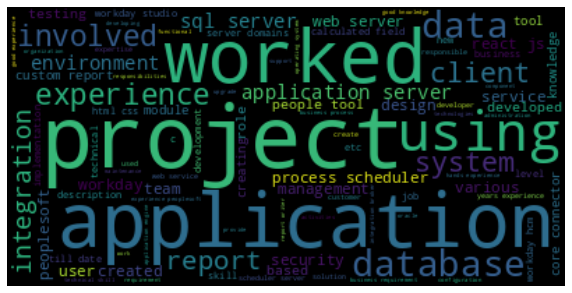

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Show** **Unique** **Categories**

In [ ]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft Resumes', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resumes', 'Workday Resumes'],
      dtype=object)

**Categories Labelled with Corresponding Resumes**



In [ ]:
data_categories = [data[data['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
data_categories

[                                              Resumes            Category
 24  c n c address manyata tech park nagavara banga...  PeopleSoft Resumes
 25  peoplesoft database administrator gangareddy p...  PeopleSoft Resumes
 26  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resumes
 27  profile summary years experience implementing ...  PeopleSoft Resumes
 28  anubhav kumar singh core competencies scriptin...  PeopleSoft Resumes
 29  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resumes
 30  hari narayana professional summary years exper...  PeopleSoft Resumes
 31  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resumes
 32  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resumes
 33  personal details name pritam biswas date birth...  PeopleSoft Resumes
 34  peoplesoft administration vivekanand sayana ca...  PeopleSoft Resumes
 35  classification internal classification interna...  PeopleSoft Resumes
 36  r ahmed peoplesoft t

**Bar Chart of Category Column**

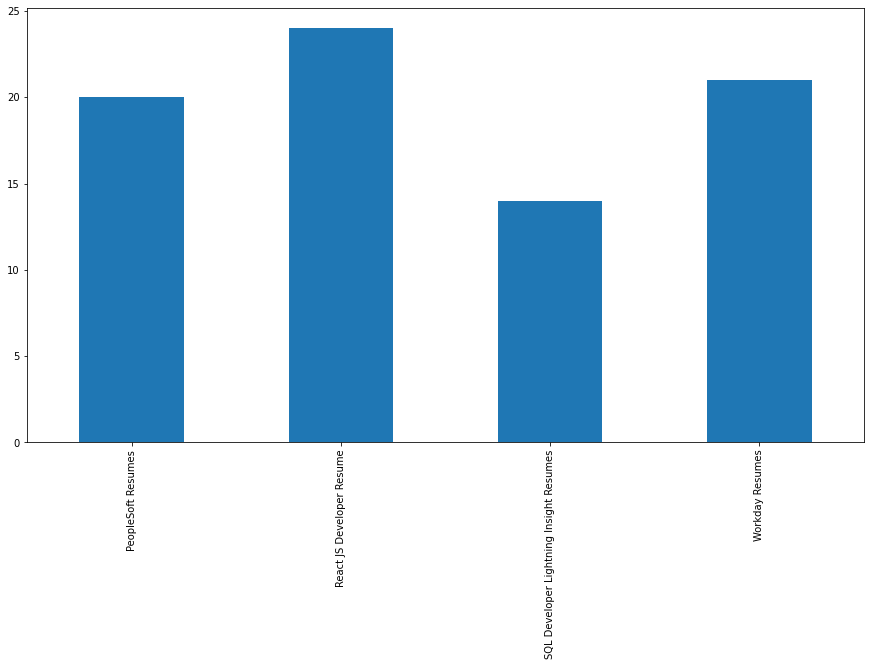

In [ ]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(15, 8))
plt.show()

**Pass Preprocessed Data for Wordcloud**

In [ ]:
def wordcloud(data):
    txt = ' '.join(txt for txt in data['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [ ]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

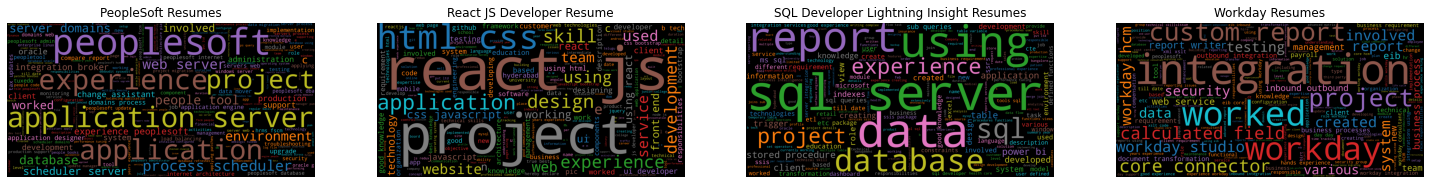

In [ ]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

**Show Word - Frequency from Resumes Column**

In [ ]:
def wordfreq(data):
    count = data['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(5)

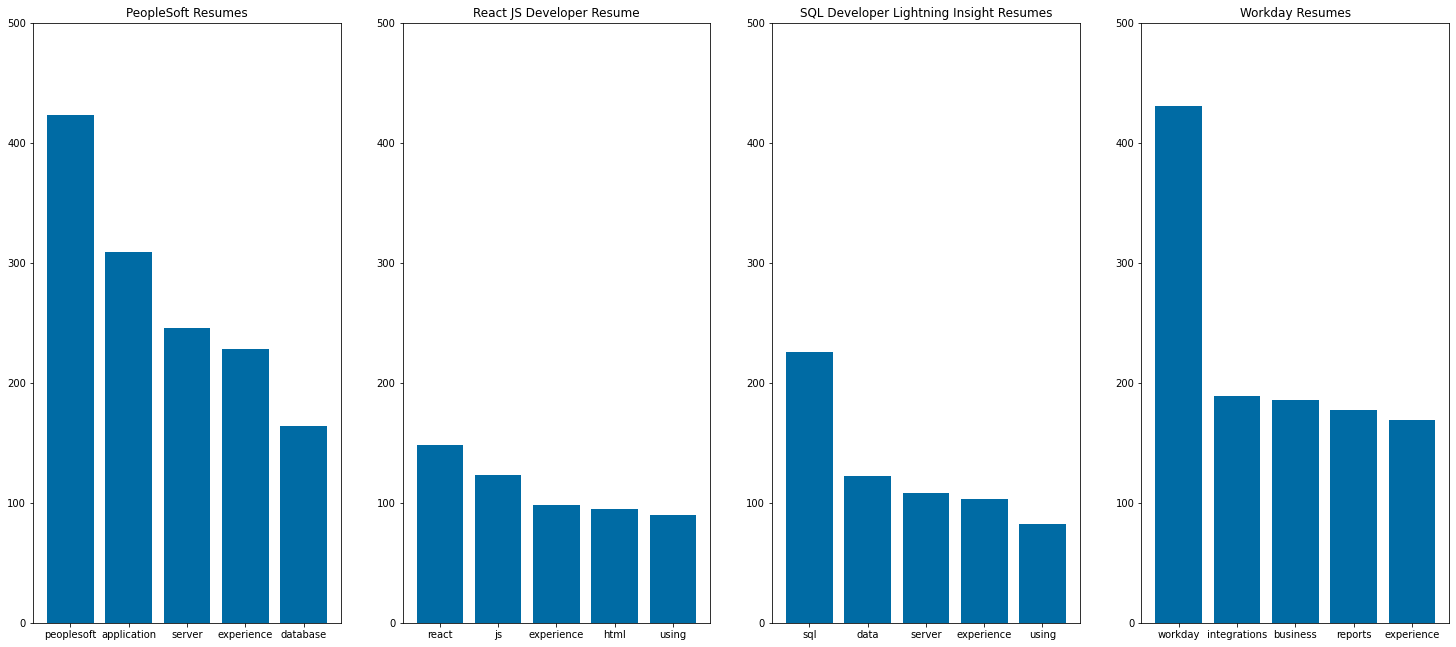

In [ ]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

**Apply LabelEncoder to Category Column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

<ipython-input-46-2bf713b25c8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = le.fit_transform(data[i])


In [ ]:
data

,Resumes,Category
0,susovan bag seeking challenging position field...,1
1,haripriya battina experience ui developer reac...,1
2,name ravali p curriculum vitae specialization ...,1
3,naveen sadhu title software developer location...,1
4,md khizaruddin rauf experience currently worki...,1
...,...,...
74,madeeswar profile summary around years experie...,3
75,vinay kumar v workday functional consultant ex...,3
76,harikrishna akula summary years experience aro...,3
77,name naresh babu cherukuri objective take resp...,3


In [ ]:
data.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

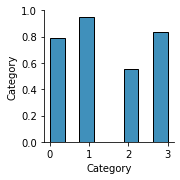

In [ ]:
import seaborn as sns
sns.pairplot(data = data)

In [ ]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']

In [ ]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [ ]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

**Pie Chart of Category Column**

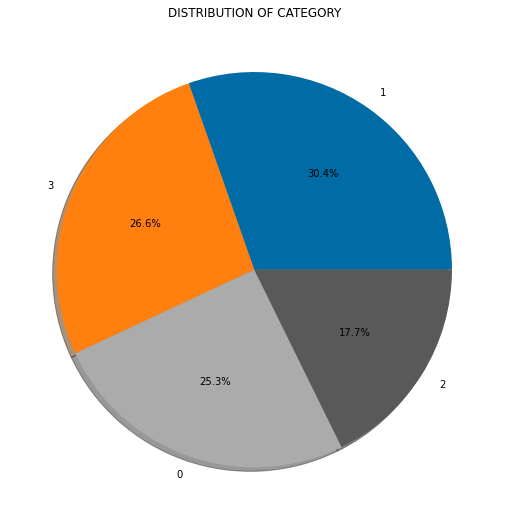

In [ ]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title="DISTRIBUTION OF CATEGORY")
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [ ]:
len(data['Resumes'])

79

In [ ]:
same=0
diff=0
for i in range(0,len(lem_words)):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 4574
Number of words not Lemmatized= 0


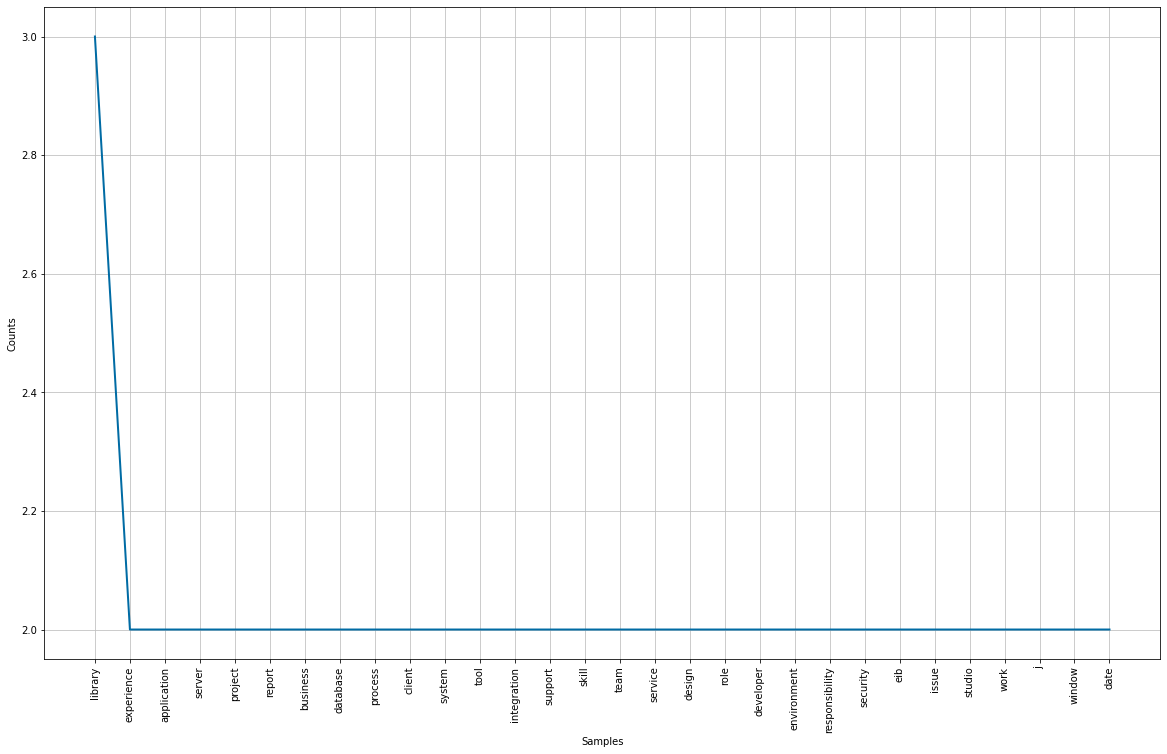

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [ ]:
requiredText = data['Resumes'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed")

Feature completed


In [ ]:
WordFeatures

<79x4464 sparse matrix of type '<class 'numpy.float64'>'
	with 19866 stored elements in Compressed Sparse Row format>

In [ ]:
from collections import Counter
import seaborn as sns
import numpy as np

<ipython-input-61-009c84e0c9a4>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = np.random.zipf(1.6, size=500).astype(np.int) % len(words)
<ipython-input-61-009c84e0c9a4>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


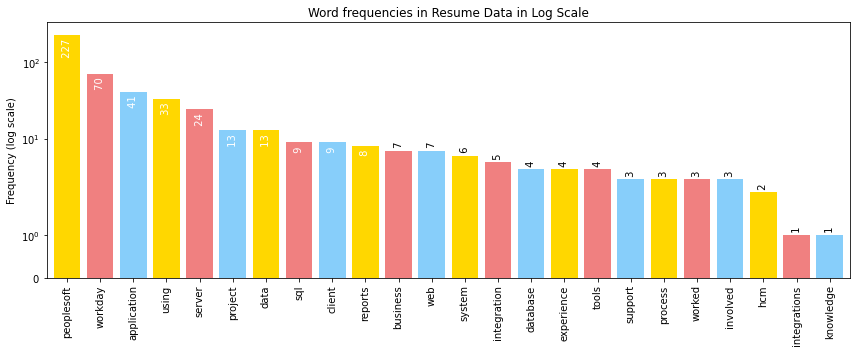

In [ ]:
# words =['using','Workday','Experience','PeopleSoft',
#  'experience','SQL','Application','data','Server',
#  'business','Project','reports','like','HCM','Worked',
#  'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
#  'Created', 'Responsibilities','Process','process','support', 
#  'application','new','People','I','team','working', 
#  'Database','database','Integration','Domains','client', 
#  'requirements','Core',  'Business', 
# 'Oracle','Report', 'Developer', 'Data']
mostcommon_25=wordfreqdist.most_common(25)
words=[]
nums=[]
for i in range (len(mostcommon_25)):
  words.append(mostcommon_25[i][0])
  nums.append(int(mostcommon_25[i][1]))
  


indices = np.random.zipf(1.6, size=500).astype(np.int) % len(words)
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
plt.bar(x, y, color=['gold','lightcoral', 'lightskyblue'])
plt.title("Word frequencies in Resume Data in Log Scale")
plt.ylabel("Frequency (log scale)")
plt.yscale('symlog') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(50)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

**Split Data into Train & Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=34, test_size=0.30, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((55, 4464), (24, 4464))

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 7.1 MB/s eta 0:00:00


In [ ]:
from pycaret.classification import *
s = setup(data = WordFeatures, target = requiredTarget, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(79, 4465)"
4,Transformed data shape,"(79, 4465)"
5,Transformed train set shape,"(55, 4465)"
6,Transformed test set shape,"(24, 4465)"
7,Numeric features,4464
8,Preprocess,True
9,Imputation type,simple


In [ ]:
 best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:48:08
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

***MODEL BUILDING***

**Import the Different Classifier Libraries**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

**Implementing Classification Models**

***Random Forest Classifier***

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set    : {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set    : 1.00


In [ ]:
print("\n Classification report for Random Forest Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Random Forest Classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [ ]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_score_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

In [ ]:
print('Accuracy   : ', accuracy_1)
print('Precision  : ', precision_1)
print('Recall     : ', recall_1)
print('f1-Score   : ', f1_score_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Accuracy   :  1.0
Precision  :  1.0
Recall     :  1.0
f1-Score   :  1.0
Confusion Matrix :
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


***Support Vector Classifier***

In [ ]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.2f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.2f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 1.00
Accuracy of Support Vector Classifier on test set    : 1.00


In [ ]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [ ]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_score_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

In [ ]:
print('Accuracy         : ', accuracy_2)
print('Precision        : ', precision_2)
print('Recall           : ', recall_2)
print('f1-Score         : ', f1_score_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy         :  1.0
Precision        :  1.0
Recall           :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


***Naive Bayes_ MultinomialNB***

In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.2f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 1.00
Accuracy of Multinomial NB Classifier on test set    : 0.96


In [ ]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True, force_alpha='warn'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      0.75      0.86         4
           3       0.88      1.00      0.93         7

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24




In [ ]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_score_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

In [ ]:
print('Accuracy        : ', accuracy_3)
print('Precision       : ', precision_3)
print('Recall          : ', recall_3)
print('f1-Score        : ', f1_score_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy        :  0.9583
Precision       :  0.9688
Recall          :  0.9375
f1-Score        :  0.9476
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 3 1]
 [0 0 0 7]]


***Logistic Regression Classifier***

In [ ]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [ ]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_score_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

In [ ]:
print('Accuracy        : ', accuracy_4)
print('Precision       : ', precision_4)
print('Recall          : ', recall_4)
print('f1-Score        : ', f1_score_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy        :  1.0
Precision       :  1.0
Recall          :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


***AdaBoost Classifier***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 0.7455
Accuracy of AdaBoost Classifier on test set    : 0.7500


In [ ]:
print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))


 Classification report for AdaBoost Classifier AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=None):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.58      1.00      0.74         7
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         7

    accuracy                           0.75        24
   macro avg       0.60      0.75      0.66        24
weighted avg       0.60      0.75      0.65        24




In [ ]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_score_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

In [ ]:
print('Accuracy        : ', accuracy_5)
print('Precision       : ', precision_5)
print('Recall          : ', recall_5)
print('f1-Score        : ', f1_score_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy        :  0.75
Precision       :  0.5958
Recall          :  0.75
f1-Score        :  0.6564
Confusion Matrix:
 [[0 5 1 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


***Gradient Boosting Classifier***

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00     

In [ ]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_score_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_score_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

***Xtreme Gradient Boosting Classifier***

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for Xtreme GradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for Xtreme GradientBoosting Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2

In [ ]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_score_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

In [ ]:
print('Accuracy        : ', accuracy_7)
print('Precision       : ', precision_7)
print('Recall          : ', recall_7)
print('f1-Score        : ', f1_score_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))

Accuracy        :  1.0
Precision       :  1.0
Recall          :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


***Light Gradient Boosting Classifier***

In [ ]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_8 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))

Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for Light Gradient Boosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_8)))


 Classification report for Light Gradient Boosting Classifier LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [ ]:
accuracy_8 = round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_score_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)

In [ ]:
print('Accuracy        : ', accuracy_8)
print('Precision       : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_score_8)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_8))

Accuracy        :  1.0
Precision       :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


***Decision Tree Classifier***

In [ ]:
#IMPORTING NECESSARY LIBRARIES FOR DECISION TREE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
prediction_9 = dt_clf.predict(X_test)
print('Accuracy of DecisionTree Classifier on training set: {:.4f}'.format(dt_clf.score(X_train, y_train)))
print('Accuracy of DecisonTree Classifier on test set    : {:.4f}'.format(dt_clf.score(X_test, y_test)))

Accuracy of DecisionTree Classifier on training set: 1.0000
Accuracy of DecisonTree Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (dt_clf, metrics.classification_report(y_test, prediction_9)))


 Classification report for Decision Tree Classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [ ]:
accuracy_9 = round(accuracy_score(y_test,prediction_9),4)
precision_9 = round(precision_score(y_test,prediction_9,average = 'macro'),4)
recall_9 = round(recall_score(y_test,prediction_9, average = 'macro'),4)
f1_score_9 = round(f1_score(y_test,prediction_9, average = 'macro'),4)

In [ ]:
print('Accuracy        : ', accuracy_9)
print('Precision       : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_score_9)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_9))

Accuracy        :  1.0
Precision       :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


**Show** **Matrix**

In [ ]:
Final_Table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier','Decision Tree Classifier'],
               'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8,accuracy_9], 
         'Precision' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8,precision_9],
         'Recall' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8,recall_9], 
         'F1-Score' : [f1_score_1, f1_score_2, f1_score_3, f1_score_4, f1_score_5, f1_score_6, f1_score_7, f1_score_8,f1_score_9]}
Final_Table = pd.DataFrame(Final_Table)
Final_Table

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
1,SVM Classifier,1.0000,1.0000,1.0000,1.0000
2,Multinomial NB Classifier,0.9583,0.9688,0.9375,0.9476
3,Logistic Regression,1.0000,1.0000,1.0000,1.0000
4,AdaBoost Classifier,0.7500,0.5958,0.7500,0.6564
5,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
6,Xtreme Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
7,Light Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
8,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000


**ACCURACY COMPARISON PLOT**

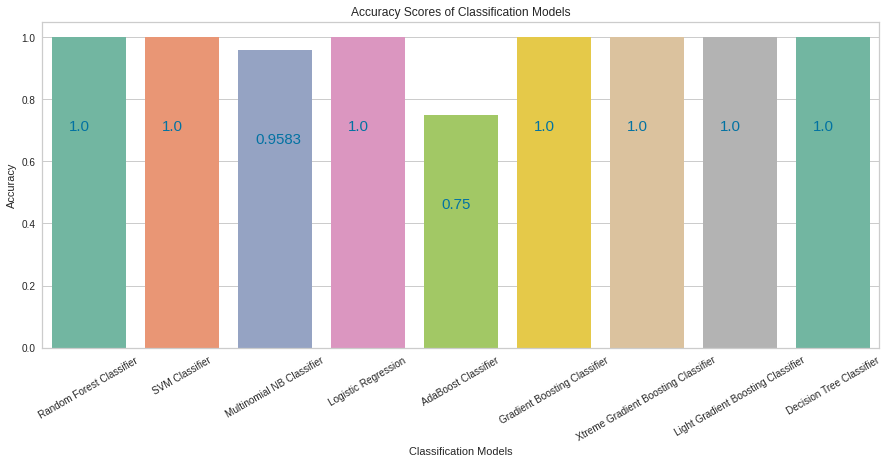

In [ ]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=Final_Table.Classifier, y=Final_Table.Accuracy, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

***FINALIZING*** ***MODEL***

**We finalize RANDOM FOREST as it gives 100% Accuracy. Random Forest fits the model in Resume Classification.**